# Telecom Churn: Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Telecom Data

In [2]:
telecom = pd.read_csv("telecom_churn.csv")
telecom.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


## Data Science Workflow

+ Descriptive Analysis
+ Statistical Analysis
+ Univariate Analysis
+ Bivariate Analysis
+ Correlation Analysis

## Descriptive Analysis

In [3]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [4]:
# describe numeric data
telecom.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [5]:
# shape of data
customers, details = telecom.shape
print(f"Custoemrs: {customers}")
print(f"Details: {details}")

Custoemrs: 3333
Details: 11


## Data Cleaning

In [6]:
# identify nullvalues and duplicated rows
telecom.isnull().sum()


Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [8]:
telecom.duplicated().sum()

0

## Univariate Analysis

In [10]:
telecom.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [26]:
# plot a histogram --> distribution for each customer detail
def histogram_plot(telecom_data, x,y):
  # initialise variables for subplot iteration
  telecom_features = telecom_data.columns 
  n_features = len(telecom_features)
  ncols = 3
  nrows = (n_features + ncols -1)//ncols

  # create subplots
  fig, hist = plt.subplots(nrows, ncols, figsize=(x,y))
  hist = hist.flatten() # Flatten the 2D array of axes into 1D for easy indexing

  # iterate feature names over each subplot
  for i,feature in enumerate(telecom_features): 
    histogram = hist[i]
    sns.histplot(data=telecom_data, x=feature, ax=histogram)
    histogram.set_xlabel(feature)
    hist[i].set_title(f'Distribution of {feature}')

  for j in range(n_features, len(hist)): 
    hist[j].axis("off")

  # adjust layout
  plt.tight_layout()
  plt.show()
  

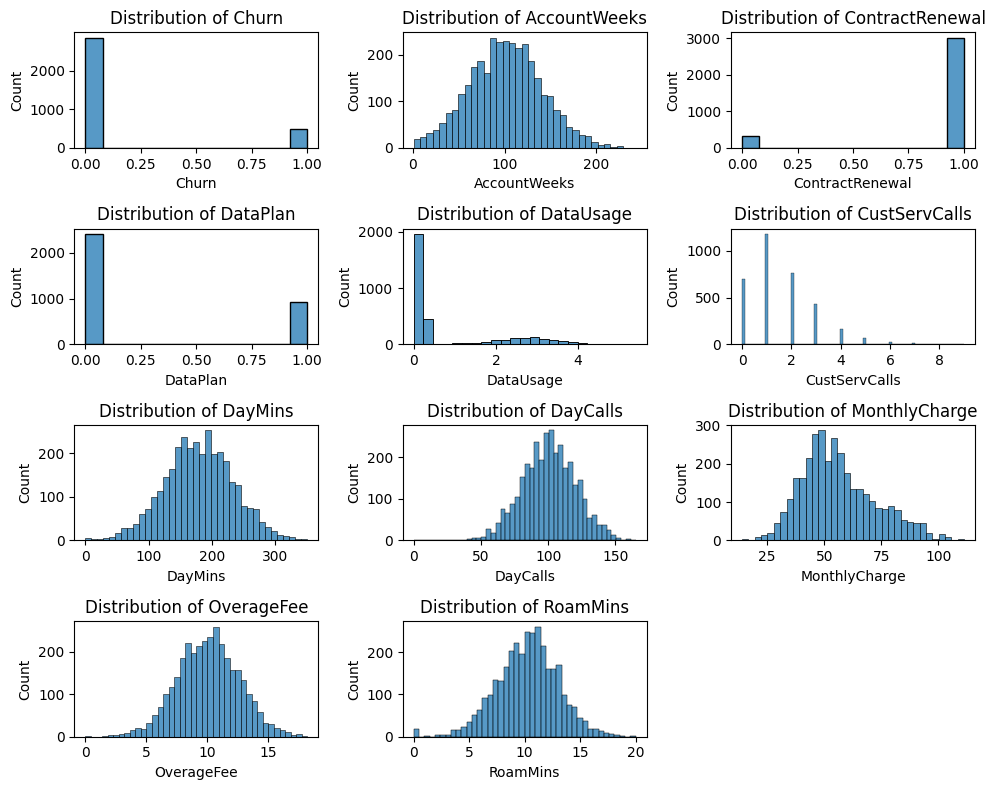

In [27]:
histogram_plot(telecom, 10,8)

In [31]:
# plot a histogram --> distribution for each customer detail
def boxplot_model(telecom_data, x,y):
  # initialise variables for subplot iteration
  telecom_features = telecom_data.columns 
  n_features = len(telecom_features)
  ncols = 3
  nrows = (n_features + ncols -1)//ncols

  # create subplots
  fig, box = plt.subplots(nrows, ncols, figsize=(x,y))
  box = box.flatten() # Flatten the 2D array of axes into 1D for easy indexing

  # iterate feature names over each subplot
  for i,feature in enumerate(telecom_features): 
    boxplot = box[i]
    sns.boxplot(data=telecom_data, x=feature, ax=boxplot)
    boxplot.set_xlabel(feature)
    boxplot.set_title(f'Distribution of {feature}')

  for j in range(n_features, len(box)): 
    box[j].axis("off")

  # adjust layout
  plt.tight_layout()
  plt.show()
  

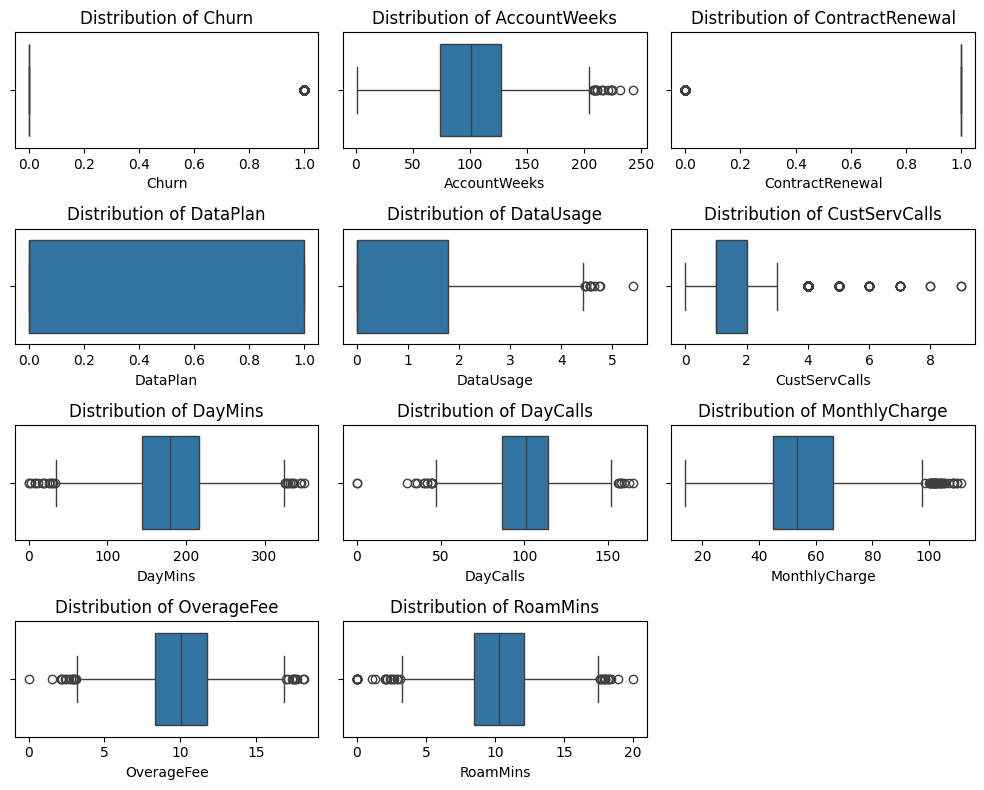

In [32]:
boxplot_model(telecom, 10,8)

Possible Outliers from this subplotting: Details
+ AccountWeeks
+ DayMins
+ DayCalls
+ OverageFee
+ CustomerService
+ DataUsage

### Outlier Detection